In [246]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [247]:
heart_disease = fetch_ucirepo(id=45) 
heart_disease=pd.concat([heart_disease.data.features,heart_disease.data.targets],axis=1)
#show simple od data
heart_disease.sample(10)  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
110,61,0,4,145,307,0,2,146,1,1.0,2,0.0,7.0,1
295,41,1,2,120,157,0,0,182,0,0.0,1,0.0,3.0,0
183,59,1,1,178,270,0,2,145,0,4.2,3,0.0,7.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
14,52,1,3,172,199,1,0,162,0,0.5,1,0.0,7.0,0
29,40,1,4,110,167,0,2,114,1,2.0,2,0.0,7.0,3
130,54,1,3,120,258,0,2,147,0,0.4,2,0.0,7.0,0
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1
100,45,1,4,115,260,0,2,185,0,0.0,1,0.0,3.0,0
41,40,1,1,140,199,0,0,178,1,1.4,1,0.0,7.0,0


In [248]:
# show shape of data (number of row ,number of column)
heart_disease.shape

(303, 14)

In [249]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [250]:
#check duplicated
print(heart_disease.duplicated().sum())

0


In [251]:
#check null values
print(heart_disease.isna().sum())
#replace null values with mean
heart_disease=heart_disease.fillna(heart_disease.mean())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


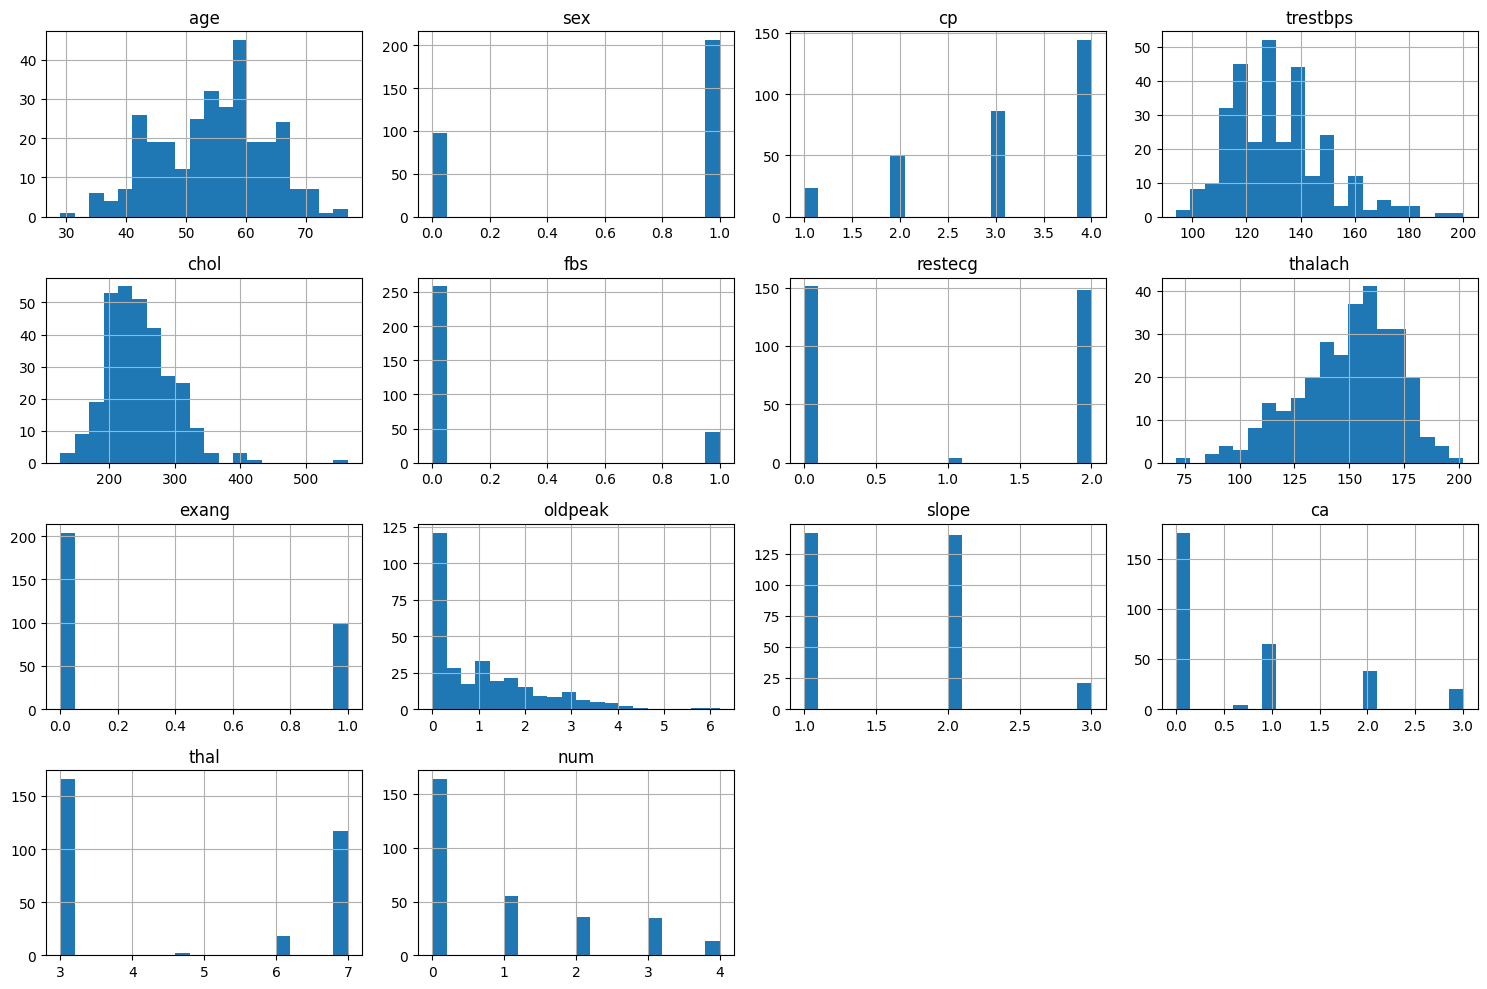

In [252]:

heart_disease.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

C:\Users\ALEX STORE\AppData\Local\Temp\ipykernel_16296\2943361472.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(heart_disease.values, labels=heart_disease.columns, vert=True)


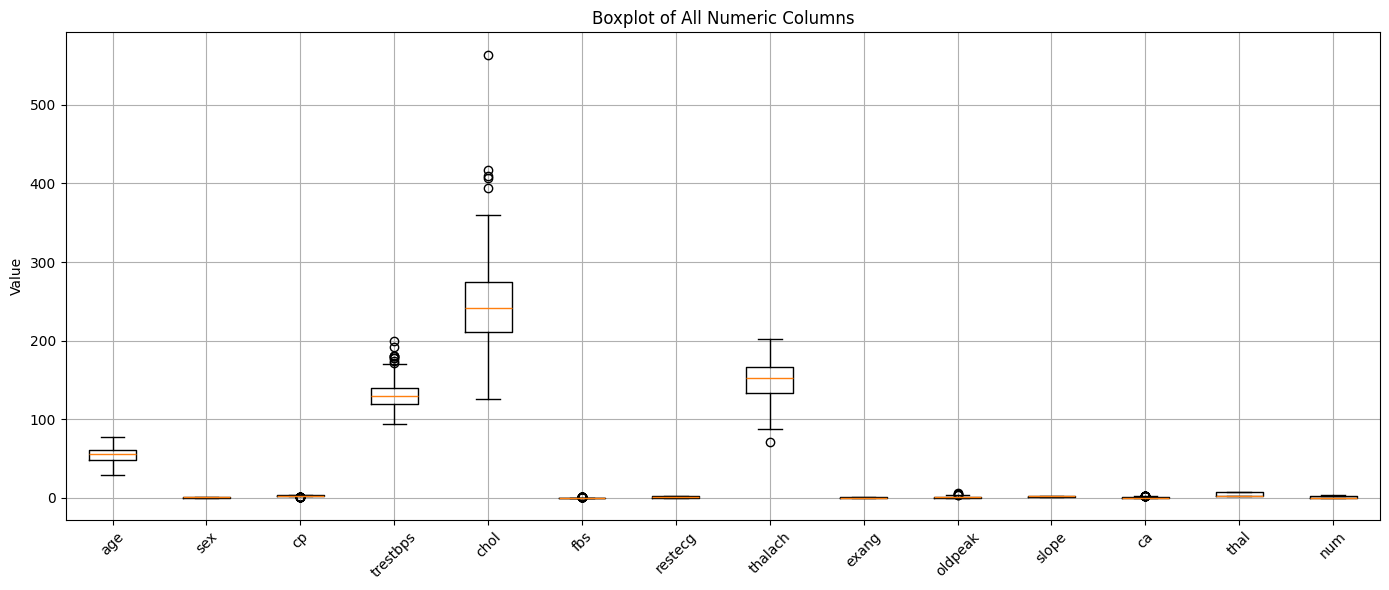

In [253]:



# Plot
plt.figure(figsize=(14, 6))
plt.boxplot(heart_disease.values, labels=heart_disease.columns, vert=True)

plt.xticks(rotation=45)
plt.title('Boxplot of All Numeric Columns')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

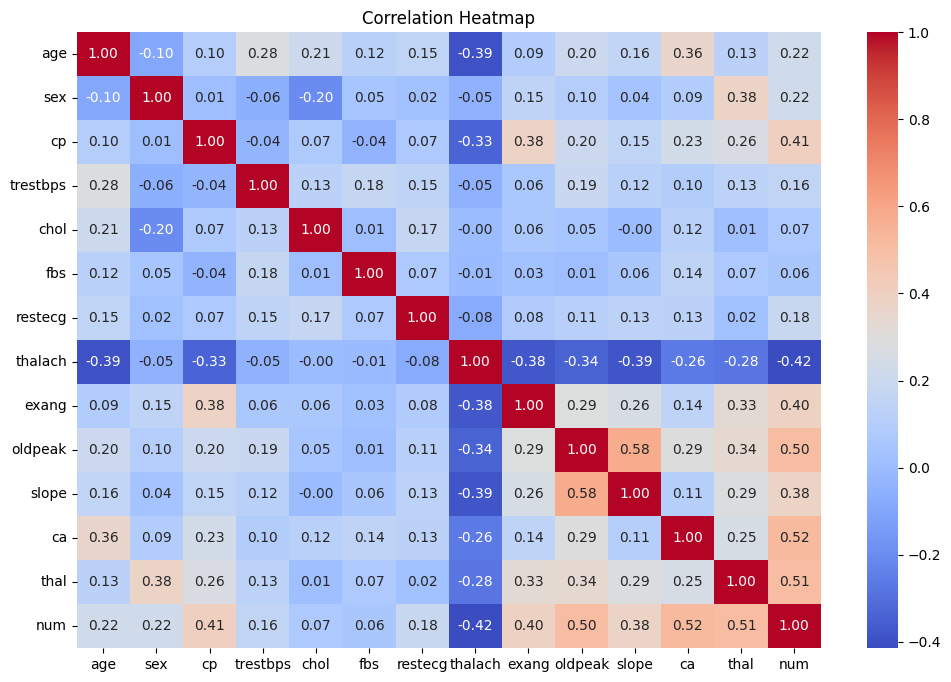

In [254]:
plt.figure(figsize=(12, 8))
sns.heatmap(heart_disease.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

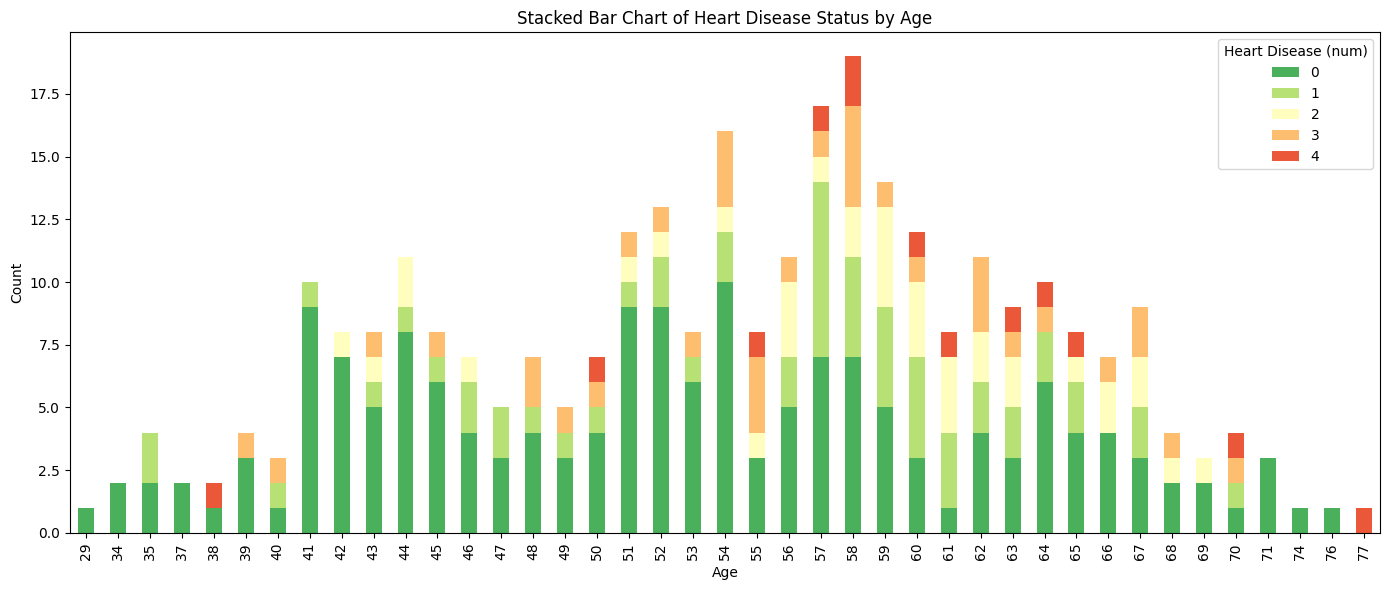

In [255]:
num_classes = heart_disease['num'].nunique()
palette = sns.color_palette("RdYlGn_r", num_classes)

age_disease_counts = heart_disease.groupby(['age', 'num']).size().unstack(fill_value=0)
age_disease_counts.plot(kind='bar', stacked=True, figsize=(14, 6), color=palette)

plt.title('Stacked Bar Chart of Heart Disease Status by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease (num)')
plt.tight_layout()
plt.show()

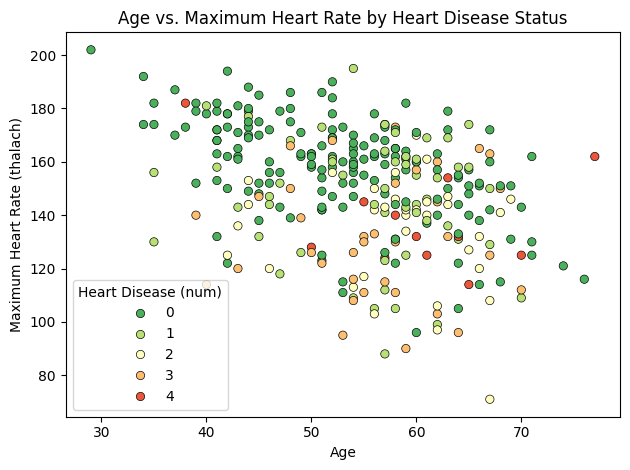

In [256]:

sns.scatterplot(
    data=heart_disease,
    x='age',
    y='thalach',
    hue='num',
    palette=palette,
    edgecolor='black'
)

plt.title('Age vs. Maximum Heart Rate by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.legend(title='Heart Disease (num)')
plt.tight_layout()
plt.show()

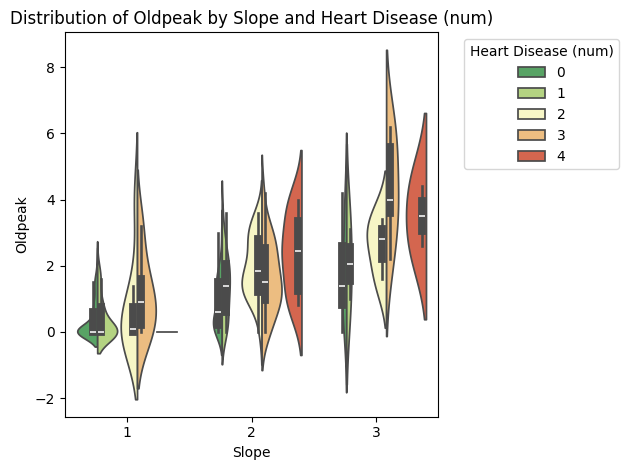

In [257]:



# Violin plot grouped by slope, hue by num (heart disease)
sns.violinplot(data=heart_disease, x='slope', y='oldpeak', hue='num',
               palette=palette, split=True, inner='box')

plt.title('Distribution of Oldpeak by Slope and Heart Disease (num)')
plt.xlabel('Slope')
plt.ylabel('Oldpeak')
plt.legend(title='Heart Disease (num)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [258]:
#feature scaling
scaler = StandardScaler()
features = heart_disease.drop(columns=['num'])
scaled_features = scaler.fit_transform(features)
heart_disease_scaled= pd.DataFrame(scaled_features, columns=features.columns)
heart_disease_scaled['num'] = heart_disease['num'].values


In [ ]:
heart_disease_scaled.to_csv("Data\heart_disease_scaled.csv",index=False)